<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_25_normalization_minmaxscaling_maxabsscaling_robustscaling/Lecture_25_normalization_minmaxscaling_maxabsscaling_robustscaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎯 Lecture:25 Feature Scaling in Machine Learning**






👉 Normalization | MinMaxScaler | MaxAbsScaler | RobustScaler

# **🧠 What is Feature Scaling?**


---


Feature Scaling is the process of bringing all the numerical values of features to the same scale, so that no single feature dominates the model just because of its range.

# **🤯 Why Scaling is Important?**


---


Imagine a dataset with:

Age==>	Income

25==>	200,000

If you don’t scale, the model might think income is 10,000x more important than age, which isn’t true.


✅ Algorithms like KNN, SVM, Logistic Regression, and Gradient Descent are highly sensitive to scale.

# **Normalization**

---

Normalization is a technique often applied as part of data preparation for machine learning.

the goal of normalization is to change the values of numeric columns in the dataset to use a common scale,
without distorting difference in the ranges of values or losing information

**🧪 Types of Feature Scaling**

We’ll cover 4 most commonly used types with code:

**🔹 1. Normalization / Min-Max Scaling**

Formula:

𝑋 scaled =𝑋 − 𝑋min / 𝑋 max − 𝑋 min



📌 Output range: [0, 1] (or custom range)

✅ Best when: You know the min and max; data is not heavily skewed.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Alcohol', 'Malic acid']] = scaler.fit_transform(df[['Alcohol', 'Malic acid']])


In [40]:
df[['Alcohol', 'Malic acid']].sample(5)

,Alcohol,Malic acid
99,-0.877801,0.748338
127,-1.495434,-0.185231
50,0.061000,-0.544297
133,-0.371343,1.089450
153,0.283348,0.865035


# **🔹 2. MaxAbs Scaling**


---



Formula:

𝑋scaled = 𝑋 / |𝑋max|


📌 Output range: [-1, 1]

✅ Best when: Data is already centered around 0 or only needs simple scaling, no shift.

In [35]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df[['Alcohol', 'Malic acid']] = scaler.fit_transform(df[['Alcohol', 'Malic acid']])


In [41]:
df[['Alcohol', 'Malic acid']].sample(5)

,Alcohol,Malic acid
128,-0.778980,-0.634063
142,0.641574,0.748338
94,-1.705429,-0.310904
50,0.061000,-0.544297
89,-1.137207,-0.903362


# **🔹 3. Robust Scaling**


---


Formula:

𝑋scaled = 𝑋 − Median / IQR


Where IQR = Interquartile Range (75th percentile - 25th percentile)

✅ Best when: Your data has outliers (e.g., salaries with some millionaires)

In [36]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df[['Alcohol', 'Malic acid']] = scaler.fit_transform(df[['Alcohol', 'Malic acid']])


In [42]:
df[['Alcohol', 'Malic acid']].sample(5)

,Alcohol,Malic acid
174,0.493343,1.412609
109,-1.717782,-0.885409
57,0.357463,-0.328857
141,0.443932,0.200764
31,0.715690,-0.607133


# **🔹 4. Standardization (Z-score Scaling)**

Formula:


𝑋 scaled = 𝑋 − 𝜇 / 𝜎



✅ Best when: You want mean = 0, std = 1

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Alcohol', 'Malic acid']] = scaler.fit_transform(df[['Alcohol', 'Malic acid']])


In [43]:
df[['Alcohol', 'Malic acid']].sample(5)

,Alcohol,Malic acid
168,0.715690,0.218717
115,-2.434235,-0.741782
46,1.703902,1.125357
58,0.888627,-0.813595
140,-0.087232,0.425180


# **💡 When to Use What?**


---


**Scaler        	When to Use**

MinMaxScaler==>	Bounded values, no extreme outliers

MaxAbsScaler==>		Data is already centered, useful in sparse data

RobustScaler==>		Data has outliers (very common in real-world)

StandardScaler==>		Needed for models assuming normal distribution

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [9]:
df.sample(5)

,Class label,Alcohol,Malic acid
123,2,13.05,5.80
31,1,13.58,1.66
81,2,12.72,1.81
147,3,12.87,4.61
0,1,14.23,1.71


<Axes: xlabel='Alcohol', ylabel='Density'>

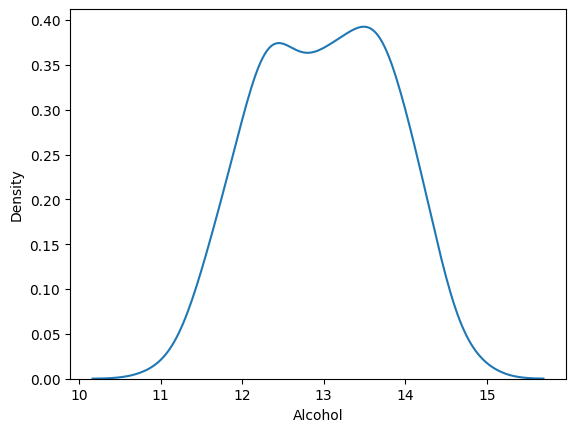

In [10]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

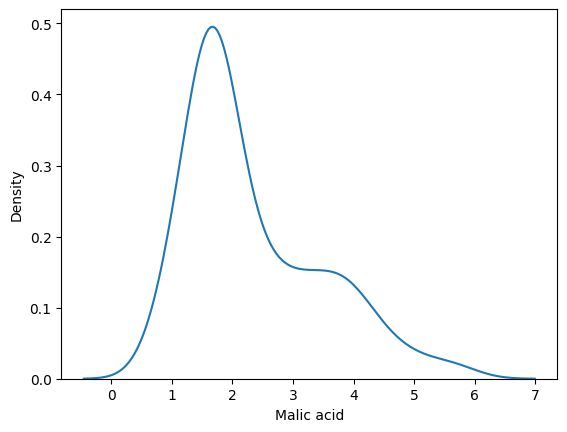

In [11]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

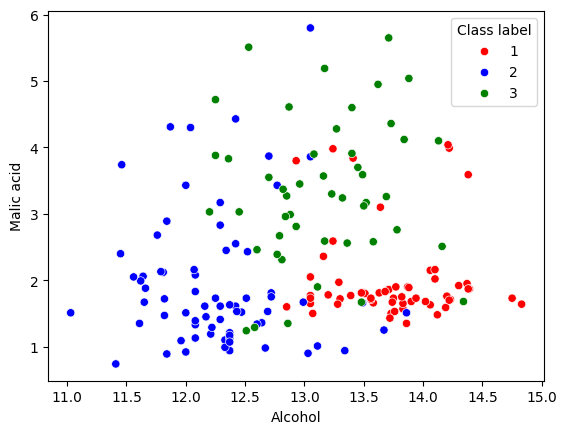

In [14]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df,x='Alcohol',y='Malic acid',hue=df['Class label'],palette=color_dict)

In [18]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(df.drop('Class label',axis=1),
                                                  df['Class label'],
                                                  test_size=0.3,
                                                  random_state=0)

x_train.shape,x_test.shape

((124, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# convert scaled data in dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [22]:
np.round(x_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [23]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


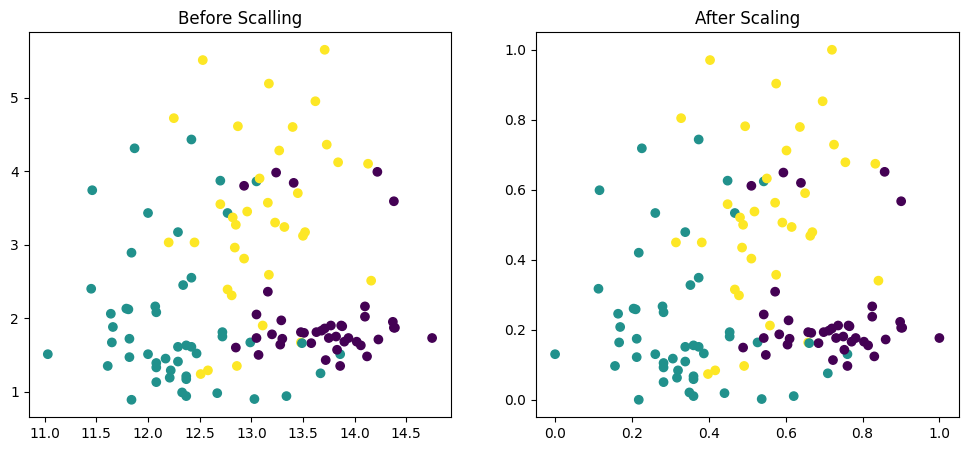

In [26]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title('Before Scalling')
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

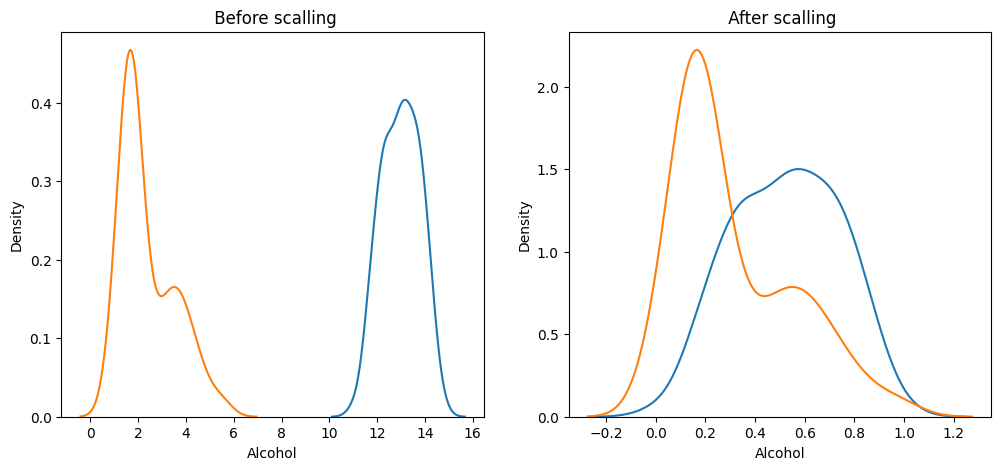

In [27]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize= (12, 5))

# before scalling
ax1.set_title(' Before scalling')

sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

# after scalling
ax2.set_title(' After scalling')

sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2)

plt.show()

<Axes: title={'center': 'Alchol Distribution After scalling'}, xlabel='Alcohol', ylabel='Density'>

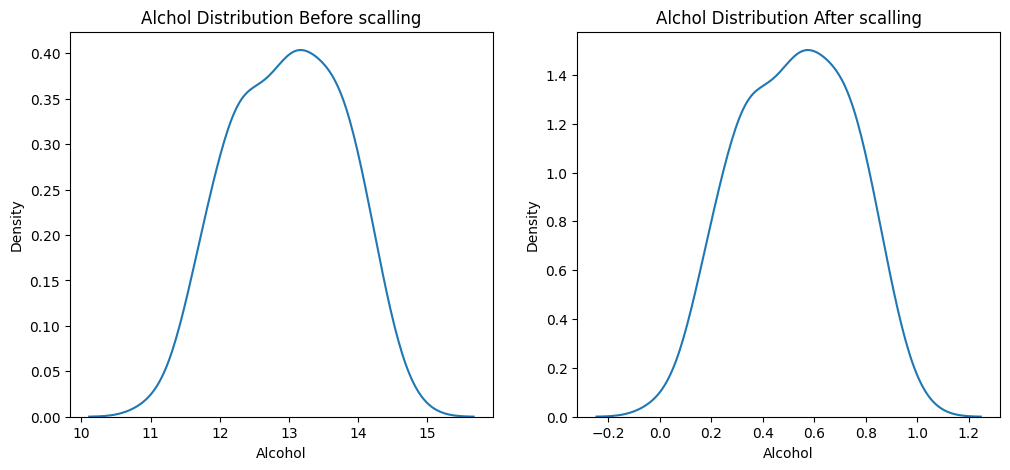

In [29]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize= (12, 5))

# before scalling

ax1.set_title('Alchol Distribution Before scalling')

sns.kdeplot(x_train['Alcohol'], ax=ax1)

# after scalling

ax2.set_title('Alchol Distribution After scalling')

sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)

<Axes: title={'center': 'Malic acid Distribution After standard scalling'}, xlabel='Malic acid', ylabel='Density'>

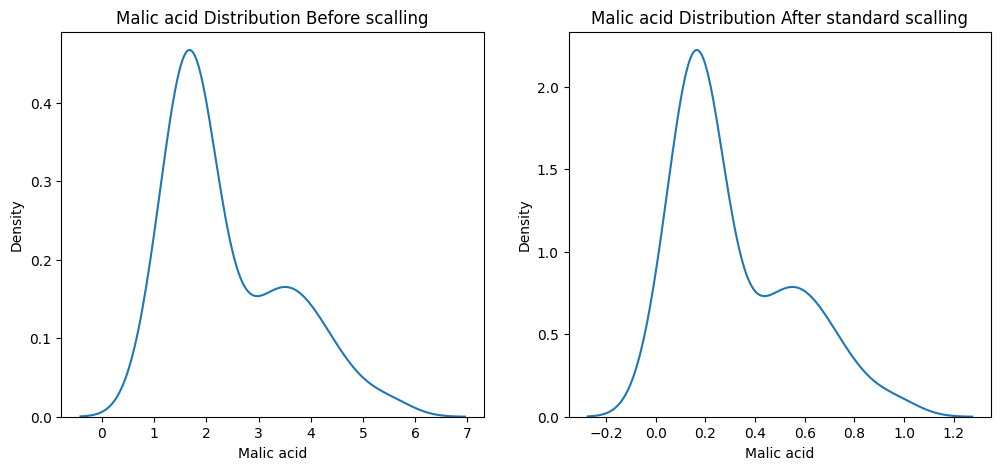

In [30]:
fig, (ax1, ax2) =plt.subplots(ncols=2, figsize= (12, 5))

# before scalling

ax1.set_title('Malic acid Distribution Before scalling')

sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scalling

ax2.set_title('Malic acid Distribution After standard scalling')

sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)

# **🔁 Summary Cheat Sheet**

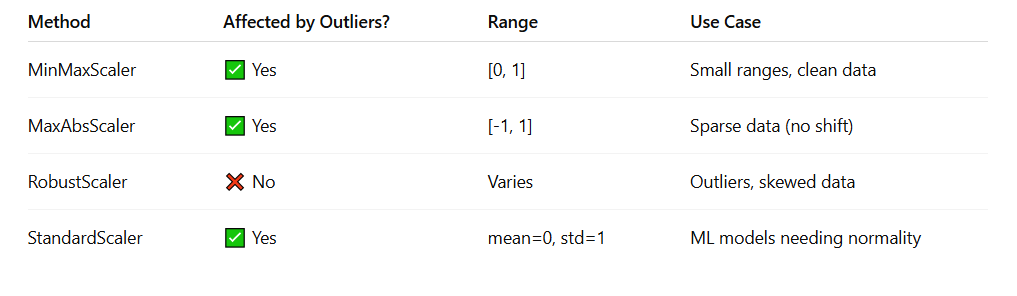